In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/Fertilizers_Recommendation_\ System_For_Disease_\ Prediction.zip

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
path_train = '/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set'
path_test = '/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set'

In [7]:
x_train=train_datagen.flow_from_directory(path_train,target_size=(128,128),
                                        class_mode='categorical',batch_size=16)
x_test=test_datagen.flow_from_directory(path_test,target_size=(128,128),
                                        class_mode='categorical',batch_size=16)

Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [8]:
model=Sequential()

In [9]:
model.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units = 300,kernel_initializer = 'uniform',activation='relu'))
model.add(Dense(units = 150,kernel_initializer = 'uniform',activation='relu'))
model.add(Dense(units = 75,kernel_initializer = 'uniform',activation='relu'))
model.add(Dense(units = 9,kernel_initializer = 'uniform',activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 300)               38102700  
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 75)                11325     
                                                        

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

712

In [11]:
model.fit(x_train,steps_per_epoch= 89,epochs=20,validation_data=x_test,validation_steps= 27)

Epoch 1/20
89/89 [==============================] - 45s 493ms/step - loss: 2.0607 - accuracy: 0.1833 - val_loss: 1.8310 - val_accuracy: 0.2593
Epoch 2/20
89/89 [==============================] - 43s 488ms/step - loss: 1.7025 - accuracy: 0.3827 - val_loss: 1.3568 - val_accuracy: 0.4954
Epoch 3/20
89/89 [==============================] - 44s 489ms/step - loss: 1.3379 - accuracy: 0.4993 - val_loss: 1.1059 - val_accuracy: 0.6134
Epoch 4/20
89/89 [==============================] - 44s 496ms/step - loss: 1.2164 - accuracy: 0.5520 - val_loss: 1.1435 - val_accuracy: 0.5787
Epoch 5/20
89/89 [==============================] - 43s 487ms/step - loss: 1.1027 - accuracy: 0.5878 - val_loss: 0.9534 - val_accuracy: 0.6343
Epoch 6/20
89/89 [==============================] - 43s 487ms/step - loss: 0.9889 - accuracy: 0.6468 - val_loss: 0.8423 - val_accuracy: 0.6435
Epoch 7/20
89/89 [==============================] - 45s 502ms/step - loss: 0.9216 - accuracy: 0.6636 - val_loss: 0.8093 - val_accuracy: 0.7292

In [12]:
train_loss,train_acc = model.evaluate(x_train,steps = 16)
validation_loss,test_acc = model.evaluate(x_test,steps = 16)

16/16 [==============================] - 2s 117ms/step - loss: 0.5454 - accuracy: 0.8320


In [13]:
print('Train:%.3f,Test:%.3f'%(train_acc,test_acc))

Train:0.836,Test:0.832


In [14]:
model.save('vegetable.h5')

In [15]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [16]:
model=load_model('vegetable.h5')

In [18]:
img=image.load_img('/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Pepper,_bell___healthy/016ed5ad-be29-4e9d-8ae5-069a016b1327___JR_HL 8536.JPG')

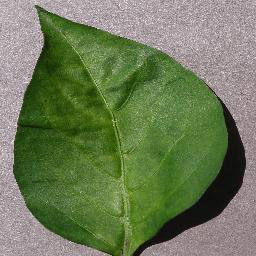

In [19]:
img

In [20]:
img=image.load_img('/content/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Pepper,_bell___healthy/016ed5ad-be29-4e9d-8ae5-069a016b1327___JR_HL 8536.JPG',target_size = (128,128))

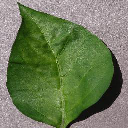

In [21]:
img


In [22]:
x = image.img_to_array(img)

In [23]:
x

array([[[210., 199., 203.],
        [166., 155., 159.],
        [151., 140., 144.],
        ...,
        [147., 135., 139.],
        [175., 163., 167.],
        [215., 203., 207.]],

       [[190., 179., 183.],
        [184., 173., 177.],
        [194., 183., 187.],
        ...,
        [154., 142., 146.],
        [192., 180., 184.],
        [166., 154., 158.]],

       [[160., 149., 153.],
        [188., 177., 181.],
        [177., 166., 170.],
        ...,
        [179., 167., 171.],
        [166., 154., 158.],
        [162., 150., 154.]],

       ...,

       [[141., 129., 133.],
        [168., 156., 160.],
        [195., 183., 187.],
        ...,
        [139., 124., 127.],
        [143., 128., 131.],
        [161., 146., 149.]],

       [[168., 156., 160.],
        [167., 155., 159.],
        [180., 168., 172.],
        ...,
        [134., 119., 122.],
        [150., 135., 138.],
        [132., 117., 120.]],

       [[170., 158., 162.],
        [175., 163., 167.],
        [179., 1

In [24]:
x = np.expand_dims(x,axis=0)

In [25]:
x

array([[[[210., 199., 203.],
         [166., 155., 159.],
         [151., 140., 144.],
         ...,
         [147., 135., 139.],
         [175., 163., 167.],
         [215., 203., 207.]],

        [[190., 179., 183.],
         [184., 173., 177.],
         [194., 183., 187.],
         ...,
         [154., 142., 146.],
         [192., 180., 184.],
         [166., 154., 158.]],

        [[160., 149., 153.],
         [188., 177., 181.],
         [177., 166., 170.],
         ...,
         [179., 167., 171.],
         [166., 154., 158.],
         [162., 150., 154.]],

        ...,

        [[141., 129., 133.],
         [168., 156., 160.],
         [195., 183., 187.],
         ...,
         [139., 124., 127.],
         [143., 128., 131.],
         [161., 146., 149.]],

        [[168., 156., 160.],
         [167., 155., 159.],
         [180., 168., 172.],
         ...,
         [134., 119., 122.],
         [150., 135., 138.],
         [132., 117., 120.]],

        [[170., 158., 162.],
       